In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
from itertools import product, cycle
import gensim
import pickle

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
viz_data = pd.read_csv('ihateairbnb.csv', index_col=0)

In [5]:
viz_data

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,SubjectID,Race,Sex,Age,BMI,IR_IS_classification,C1 species,C2 species,C3 species,C4 species,C5 species
0,8221,9301,2300,8004,1553,ZY7IW45,C,F,69.00,36.36,IR,NaN,Bacteroides,NaN,Eubacterium,Alistipes putredinis
1,7541,2688,6529,4827,6744,ZPEL6L3,C,F,52.33,24.44,IS,NaN,NaN,Bacteroides,NaN,NaN
2,11689,2994,5769,1680,353,ZWHMV5E,C,F,62.80,33.96,IR,Bacteroides,Ruminococcus,NaN,Roseburia intestinalis,Alistipes putredinis
3,2608,1738,3335,3886,2254,ZRLZ98T,C,F,56.13,24.54,IS,NaN,Ruminococcus,Firmicutes,Alistipes/Rikenellaceae,Alistipes shahii
4,5347,5457,2050,2094,1451,ZPXU188,C,F,60.95,36.64,Unknown,Dysosmobacter welbionis/Oscillospiraceae,NaN,NaN,NaN,NaN
5,4253,3916,7389,5066,7425,ZYXQKWY,C,F,50.70,32.59,IR,Bacteroides,Faecalibacterium prausnitzii,Bacteroides,NaN,Bacteroides
6,8237,7323,4157,5953,4393,ZQNZSQF,C,F,41.65,40.83,Unknown,NaN,NaN,Bacteroides,NaN,Blautia
7,6197,6958,8856,2353,8817,ZY39SN0,C,F,56.26,35.26,Unknown,NaN,NaN,Bacteroides,NaN,Clostridium/Lachnospiraceae
8,3465,3393,3364,4029,2042,ZUF48YS,C,F,69.44,26.04,Unknown,NaN,Bacteroides,NaN,Bacteroides,Ruminococcus
9,2910,4990,2221,1812,4974,ZYHHR4Z,C,F,43.99,26.47,Unknown,Ruminococcus,NaN,Alistipes putredinis,Ruthenibacterium lactatiformans,Bacteroides


### These files are created in the HMP-T2D-Vectorization notebooks

In [6]:
#load patient vectors from female dataset
vec_p1 = pickle.load(open("vec_p1.p", "rb"))
vec_p2 = pickle.load(open("vec_p2.p", "rb"))
vec_p3 = pickle.load(open("vec_p3.p", "rb"))
vec_p4 = pickle.load(open("vec_p4.p", "rb"))

In [7]:
#load patient vectors from obese dataset
ob_vec_p1 = pickle.load(open("ob_vec_p1.p", "rb"))
ob_vec_p2 = pickle.load(open("ob_vec_p2.p", "rb"))
ob_vec_p3 = pickle.load(open("ob_vec_p3.p", "rb"))
ob_vec_p4 = pickle.load(open("ob_vec_p4.p", "rb"))

In [8]:
#load patient vectors from non-obese dataset
no_vec_p1 = pickle.load(open("no_vec_p1.p", "rb"))
no_vec_p2 = pickle.load(open("no_vec_p2.p", "rb"))
no_vec_p3 = pickle.load(open("no_vec_p3.p", "rb"))
no_vec_p4 = pickle.load(open("no_vec_p4.p", "rb"))

In [9]:
#load patient vectors from males dataset
m_vec_p1 = pickle.load(open("m_vec_p1.p", "rb"))
m_vec_p2 = pickle.load(open("m_vec_p2.p", "rb"))
m_vec_p3 = pickle.load(open("m_vec_p3.p", "rb"))
m_vec_p4 = pickle.load(open("m_vec_p4.p", "rb"))

In [10]:
#load patient vectors from race dataset
r_vec_p1 = pickle.load(open("r_vec_p1.p", "rb"))
r_vec_p2 = pickle.load(open("r_vec_p2.p", "rb"))
r_vec_p3 = pickle.load(open("r_vec_p3.p", "rb"))
r_vec_p4 = pickle.load(open("r_vec_p4.p", "rb"))

In [11]:
#calculate average for each patient, keeps patient number consistent with viz_data
p0 = sum(vec_p1)/len(vec_p1)
p1 = sum(vec_p2)/len(vec_p2)
p2 = sum(vec_p3)/len(vec_p3)
p3 = sum(vec_p4)/len(vec_p4)
p4 = sum(ob_vec_p1)/len(ob_vec_p1)
p5 = sum(ob_vec_p2)/len(ob_vec_p2)
p6 = sum(ob_vec_p3)/len(ob_vec_p3)
p7 = sum(ob_vec_p4)/len(ob_vec_p4)
p8 = sum(no_vec_p1)/len(no_vec_p1)
p9 = sum(no_vec_p2)/len(no_vec_p2)
p10 = sum(no_vec_p3)/len(no_vec_p3)
p11 = sum(no_vec_p4)/len(no_vec_p4)
p12 = sum(m_vec_p1)/len(m_vec_p1)
p13 = sum(m_vec_p2)/len(m_vec_p2)
p14 = sum(m_vec_p3)/len(m_vec_p3)
p15 = sum(m_vec_p4)/len(m_vec_p4)
p16 = sum(r_vec_p1)/len(r_vec_p1)
p17 = sum(r_vec_p2)/len(r_vec_p2)
p18 = sum(r_vec_p3)/len(r_vec_p3)
p19 = sum(r_vec_p4)/len(r_vec_p4)

ave_mb = [p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, p16, p17, p18, p19]
viz_data['Patient Vec'] = ave_mb
viz_data['Is Obese'] = viz_data['BMI'] >= 30.0
viz_data['IR/IS'] = viz_data['IR_IS_classification'].replace({'IR':0, 'IS':1, 'Unknown':0})

In [12]:
#run PCA to color by obesity status, IR/IS etc..
pca = PCA(n_components=2)
pca.fit(ave_mb)
pcafeatures_train = pca.transform(ave_mb)

In [39]:
def plot_PCA_2D(data, target, target_names):
    colors = cycle(['#7fee97','#eb5e55','#697268'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(8,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend(loc=2, prop={'size': 14})

In [14]:
#color by gender
sample_target = []

for i in viz_data['Sex']:
    if i == 'M':
        sample_target.append(0)
    else:
        sample_target.append(1)

### Clustering by patient based on average vector of all bacterial reads in the dataset

In [ ]:
plot_PCA_2D(pcafeatures_train, target=np.array(sample_target), target_names=['male', 'female'])

In [17]:
#randomly sample bacteria from each patient for clustering
np.random.seed(42)
ind_0 = np.random.choice(len(vec_p1), 500, replace=False).tolist()
ind_1 = np.random.choice(len(vec_p2), 500, replace=False).tolist()
ind_2 = np.random.choice(len(vec_p3), 500, replace=False).tolist()
ind_3 = np.random.choice(len(vec_p4), 500, replace=False).tolist()
ind_4 = np.random.choice(len(ob_vec_p1), 500, replace=False).tolist()
ind_5 = np.random.choice(len(ob_vec_p2), 500, replace=False).tolist()
ind_6 = np.random.choice(len(ob_vec_p3), 500, replace=False).tolist()
ind_7 = np.random.choice(len(ob_vec_p4), 500, replace=False).tolist()
ind_8 = np.random.choice(len(no_vec_p1), 500, replace=False).tolist()
ind_9 = np.random.choice(len(no_vec_p2), 500, replace=False).tolist()
ind_10 = np.random.choice(len(no_vec_p3), 500, replace=False).tolist()
ind_11 = np.random.choice(len(no_vec_p4), 500, replace=False).tolist()
ind_12 = np.random.choice(len(m_vec_p1), 500, replace=False).tolist()
ind_13 = np.random.choice(len(m_vec_p2), 500, replace=False).tolist()
ind_14 = np.random.choice(len(m_vec_p3), 500, replace=False).tolist()
ind_15 = np.random.choice(len(m_vec_p4), 500, replace=False).tolist()
ind_16 = np.random.choice(len(r_vec_p1), 500, replace=False).tolist()
ind_17 = np.random.choice(len(r_vec_p2), 500, replace=False).tolist()
ind_18 = np.random.choice(len(r_vec_p3), 500, replace=False).tolist()
ind_19 = np.random.choice(len(r_vec_p4), 500, replace=False).tolist()

In [18]:
sam_0 = [vec_p1[i] for i in ind_0]
sam_1 = [vec_p2[i] for i in ind_1]
sam_2 = [vec_p3[i] for i in ind_2]
sam_3 = [vec_p4[i] for i in ind_3]
sam_4 = [ob_vec_p1[i] for i in ind_4]
sam_5 = [ob_vec_p2[i] for i in ind_5]
sam_6 = [ob_vec_p3[i] for i in ind_6]
sam_7 = [ob_vec_p4[i] for i in ind_7]
sam_8 = [no_vec_p1[i] for i in ind_8]
sam_9 = [no_vec_p2[i] for i in ind_9]
sam_10 = [no_vec_p3[i] for i in ind_10]
sam_11 = [no_vec_p4[i] for i in ind_11]
sam_12 = [m_vec_p1[i] for i in ind_12]
sam_13 = [m_vec_p2[i] for i in ind_13]
sam_14 = [m_vec_p3[i] for i in ind_14]
sam_15 = [m_vec_p4[i] for i in ind_15]
sam_16 = [r_vec_p1[i] for i in ind_16]
sam_17 = [r_vec_p2[i] for i in ind_17]
sam_18 = [r_vec_p3[i] for i in ind_18]
sam_19 = [r_vec_p4[i] for i in ind_19]

In [19]:
#color by obesity
sample_target = []

for i in viz_data['Is Obese']:
    if i == True:
        sample_target.append(np.ones(500))
    else:
        sample_target.append(np.zeros(500))

In [20]:
#color by IR/IS
sample_target = []

for i in viz_data['IR/IS']:
    if i == 0:
        sample_target.append(np.zeros(500))
    elif i == 1:
        sample_target.append(np.ones(500))
    else:
        sample_target.append(np.full(500, 2))

In [21]:
#color by gender
sample_target = []

for i in viz_data['Sex']:
    if i == 'M':
        sample_target.append(np.ones(500))
    else:
        sample_target.append(np.zeros(500))

In [22]:
#run PCA to color by obesity status, IR/IS etc
X = np.concatenate((sam_0, sam_1, sam_2, sam_3, sam_4, sam_5, sam_6, sam_7, sam_8, sam_9, sam_10, 
                    sam_11, sam_12, sam_13, sam_14, sam_15, sam_16, sam_17, sam_18, sam_19))
y = np.concatenate(sample_target)

In [23]:
pca = PCA(n_components=2)
pca.fit(X)
pcafeatures_train = pca.transform(X)

### Clustering a random sample of 500 reads from each patient

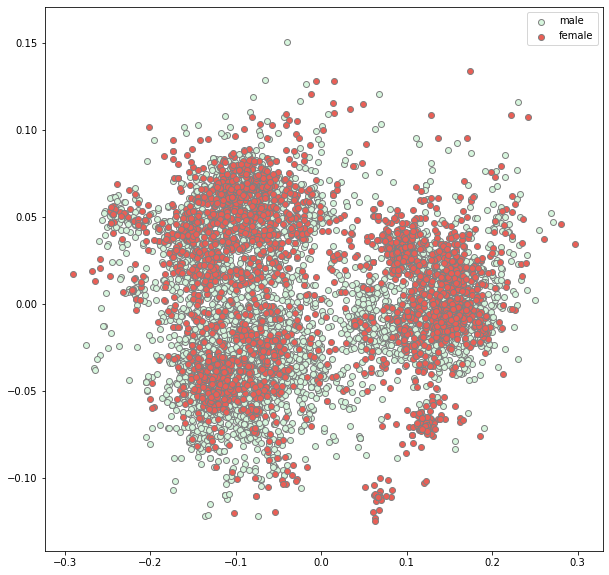

In [24]:
plot_PCA_2D(pcafeatures_train, target=y, target_names=['male', 'female'])

### Clustering for final presentation, chose patient 6 and 12 (obese p_1 and non-obese p_4), silhouette score was used as a loose measure of microbiome diversity

In [25]:
hc = AgglomerativeClustering(linkage='ward', n_clusters=3)
hc.fit(X)
labels = hc.labels_
p = np.bincount(labels)
ii = np.nonzero(p)[0]
print(list(zip(ii,p[ii])))
silhouette_score(X, labels=labels)

[(0, 4435), (1, 2718), (2, 2847)]


0.3651891

In [26]:
pca = PCA(n_components=2)
pca.fit(X)
pcafeatures_train = pca.transform(X)

0.5045754

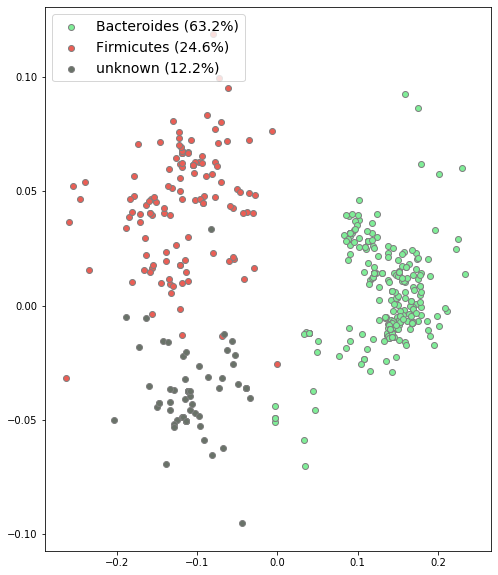

In [40]:
plot_PCA_2D(pcafeatures_train[2500:3000], target=labels[2500:3000], 
            target_names=['Bacteroides (63.2%)', 'Firmicutes (24.6%)', 'unknown (12.2%)'])
silhouette_score(X[2500:3000], labels=labels[2500:3000])

0.20403296

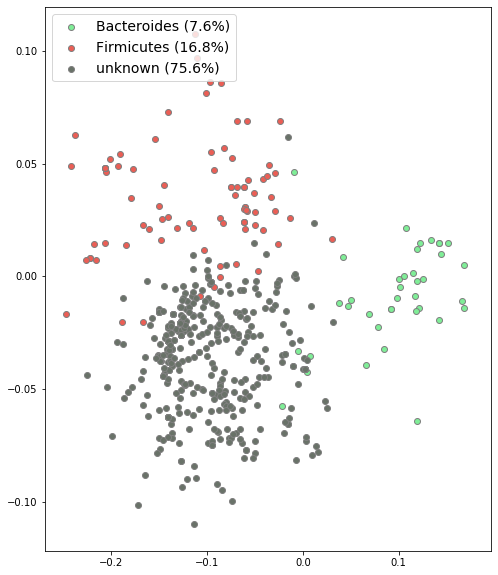

In [41]:
plot_PCA_2D(pcafeatures_train[5500:6000], target=labels[5500:6000], 
            target_names=['Bacteroides (7.6%)', 'Firmicutes (16.8%)', 'unknown (75.6%)'])
silhouette_score(X[5500:6000], labels=labels[5500:6000])

### I used these cells to find the most "compelling" clustering examples between obese/non-obese

In [ ]:
a = labels[0:500] #patient 1
b = labels[500:1000] #patient 2
c = labels[1000:1500] #patient 3
d = labels[1500:2000] #patient 4
e = labels[2000:2500] #patient 5
f = labels[2500:3000] #patient 6
g = labels[3000:3500] #patient 7
h = labels[3500:4000] #patient 8
i = labels[4000:4500] #patient 9
j = labels[4500:5000] #patient 10
k = labels[5000:5500] #patient 11
l = labels[5500:6000] #patient 12

In [ ]:
#obese
y = np.bincount(a)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(c)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(e)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(f)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(g)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(h)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))

In [ ]:
#non-obese
y = np.bincount(b)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(d)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(i)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(j)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(k)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))
y = np.bincount(l)
ii = np.nonzero(y)[0]
print(list(zip(ii,y[ii])))

### These functions are the same as in the MicrobiomePCAandClustering notebooks used to find the "center" or 5 "center-most" points in the clusters in order to plug the sequences back into MOLE-BLAST

In [ ]:
def find_nearest(vectors, center):
    current_min = (0, 1)
    for i, vector in enumerate(vectors):
        new_min = (i, sum(np.abs(np.subtract(np.asarray(vector), np.asarray(center)))))
        if new_min[1] < current_min[1]:
            current_min = new_min
    return current_min

In [133]:
#find "centers" of agglomerative clustering
#actually it's the average of all points of that cluster in the 10-dim space
#find_nearest returns the vector that is "nearest" to the determined "center"
def find_center(labels, num_clusters, vectors):
    hc_centers = []
    actual_centers = []
    for clust in range(num_clusters):
        clust_ind = [i for i, x in enumerate(labels) if x == clust]
        vec_ind = [vectors[i] for i in clust_ind]
        hc_centers.append(sum(vec_ind)/len(clust_ind))
    
    for center in hc_centers:
        actual_centers.append(find_nearest(vectors, center))
    return actual_centers

In [134]:
def sort_tuple(tup):       
    # getting length of list of tuples 
    lst = len(tup)  
    for i in range(0, lst):  
        for j in range(0, lst-i-1):  
            if (tup[j][1] > tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup

In [135]:
def find_five_nearest(vectors, center):
    mins = []
    for i, vector in enumerate(vectors):
        mins.append((i, sum(np.abs(np.subtract(np.asarray(vector), np.asarray(center))))))
    return sort_tuple(mins)[0:5]

In [136]:
def find_five(labels, num_clusters, vectors):
    hc_centers = []
    actual_centers = []
    for clust in range(num_clusters):
        clust_ind = [i for i, x in enumerate(labels) if x == clust]
        vec_ind = [vectors[i] for i in clust_ind]
        hc_centers.append(sum(vec_ind)/len(clust_ind))
    
    for center in hc_centers:
        actual_centers.append(find_five_nearest(vectors, center))
    return actual_centers

### Results of clustering all 20 patients, Phylum classification was determined by finding original sequence associated with center points and searching them via NCBI's MOLE-BLAST

In [142]:
find_center(labels, 3, X)

[(6666, 0.07229110971093178),
 (9003, 0.07349686697125435),
 (4283, 0.06585418805480003)]

In [138]:
find_five(labels, 3, X)

[[(6666, 0.07229110971093178),
  (9818, 0.07666048035025597),
  (2953, 0.07944438606500626),
  (7032, 0.08225641027092934),
  (4290, 0.08313632756471634)],
 [(9003, 0.07349686697125435),
  (4756, 0.077377213165164),
  (4627, 0.0776745043694973),
  (4579, 0.07852626964449883),
  (7277, 0.08463514596223831)],
 [(4283, 0.06585418805480003),
  (4226, 0.06813875585794449),
  (9852, 0.06969159096479416),
  (6481, 0.06990964338183403),
  (3455, 0.07965791970491409)]]

cluster 1<br>
6666 - patient 14 ind 166 (Bacteroides)<br>
9818 - patient 20 ind 318 (Bacteroides)<br>
2953 - patient 6 ind 453 (Bacteroides)<br>
7032 - patient 15 ind 32 (Bacteroides)<br>
4290 - patient 9 ind 290 (Bacteroides)

In [147]:
print('p14:', ind_13[166])
print('p20:', ind_19[318])
print('p6:', ind_5[453])
print('p15:', ind_14[32])
print('p9:', ind_8[290])

p14: 38053
p20: 17601
p6: 27342
p15: 24212
p9: 11187


cluster 2<br>
9003 - patient 19 ind 3 (unknown)<br>
4756 - patient 10 ind 256 (Firmicutes)<br>
4627 - patient 10 ind 127 (unknown)<br>
4579 - patient 10 ind 79 (Firmicutes)<br>
7277 - patient 15 ind 277 (unknown)

In [148]:
print('p19:', ind_18[3])
print('p10:', ind_9[256])
print('p10:', ind_9[127])
print('p10:', ind_9[79])
print('p15:', ind_14[277])

p19: 5474
p10: 3739
p10: 13714
p10: 4008
p15: 28802


cluster 3<br>
4283 - patient 9 ind 283 (unknown)<br>
4226 - patient 9 ind 226 (unknown)<br>
9852 - patient 20 ind 352 (unknown<br>
6481 - patient 13 ind 481 (unknown)<br>
3455 - patient 7 ind 455 (unknown)

In [149]:
print('p9:', ind_8[283])
print('p9:', ind_8[226])
print('p20:', ind_19[352])
print('p13:', ind_12[481])
print('p7:', ind_6[455])

p9: 5161
p9: 11107
p20: 6655
p13: 59096
p7: 13681
